<a href="https://colab.research.google.com/github/saisushantht/Iris-Flowers-Classification-/blob/master/Iris_Flowers_Classification_with_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris-Flowers-Classification with Decision Tree**






In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import os

Getting Dataset from Github repo

In [3]:
url = 'https://raw.githubusercontent.com/saisushantht/Iris-Flowers-Classification-/master/IRIS.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()   #summary of the dataFrame we can conform that there are no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

Data Visualization using Matplotlib.pyplot

Scatter plot

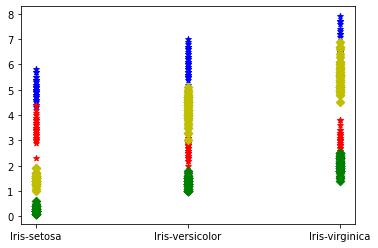

In [10]:
x=df['species']
y0=df['sepal_length']
y1=df['sepal_width']
y2=df['petal_width']
y3=df['petal_length']
plt.scatter(x,y0,color='b',marker='*')
plt.scatter(x,y1,color='r',marker='*')
plt.scatter(x,y2,color='g',marker='D')
plt.scatter(x,y3,color='y',marker='D')

Bar plot

<BarContainer object of 150 artists>

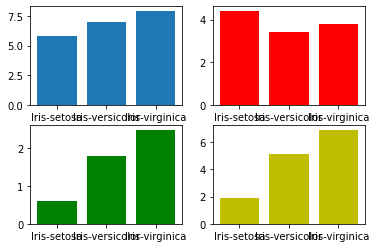

In [11]:
fig,a=plt.subplots(2,2)
a[0,0].bar(x,y0)
a[0,1].bar(x,y1,color='r')
a[1,0].bar(x,y2,color='g')
a[1,1].bar(x,y3,color='y')

line plot

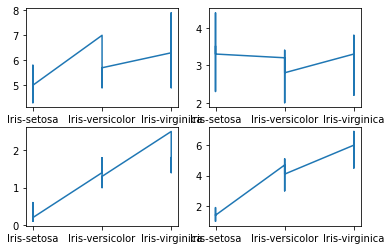

In [12]:
fig,a=plt.subplots(2,2)
a[0,0].plot(x,y0)
a[0,1].plot(x,y1)
a[1,0].plot(x,y2)
a[1,1].plot(x,y3)

In [14]:
X=df.drop('species',axis=1)
Y=df['species']
print(X.shape,Y.shape)
X

(150, 4) (150,)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X=np.array(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. 

---

LabelEncoder converts each class under specified feature to a numerical value.

---


Encode target labels with value between 0 and n_classes-1.

In [18]:
from sklearn.preprocessing import LabelEncoder          # import labelencoder

le = LabelEncoder()                                                          # instantiate labelencoder object

Y=le.fit_transform(Y)                                                        # apply le on categorical feature columns
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [20]:
print(Y_train.shape)
Y_train

(105,)


array([0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 0,
       0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2])

A decision tree classifier.

In [21]:
from sklearn import tree                                          #Import the model

model=tree.DecisionTreeClassifier()                         # instance of the Model
model.fit(X_train,Y_train)                                            #Train the model on the data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predict labels of unseen (test) data

In [28]:
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)*100

In [29]:
accuracy

91.11111111111111